# <center> Proyecto Final

* **Manuel Jesús Casillas Olivier**

### <center>Temas Selectos de Física Computacional III
#### <center> 10/12/2023
#### <center> Semestre 2024-1


____________________

In [86]:
# Cargamos las librerías necesarias
import tensorflow as tf  # Importamos TensorFlow para construir y entrenar modelos de aprendizaje profundo
import tensorflow_datasets as tfds  # Importamos TensorFlow Datasets para acceder a conjuntos de datos predefinidos
from tensorflow import keras
from keras.callbacks import TensorBoard  # Importamos TensorBoard para realizar seguimiento y visualización del rendimiento del modelo
from keras.models import Sequential
import pandas as pd  # Importamos Pandas para la manipulación y análisis de datos en formato tabular
import numpy as np  # Importamos NumPy para realizar operaciones numéricas eficientes
import matplotlib.pyplot as plt  # Importamos Matplotlib para la creación de visualizaciones y gráficos
import cv2  # Importamos OpenCV para operaciones de visión por computadora, incluyendo procesamiento de imágenes

In [ ]:
#Descargamos los datos de SVHN(Street View House Numbers), Standford atraves tensorflow
datos, metadatos = tfds.load('svhn_cropped',as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/73257 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/3.0.0.incomplete2YGHJT/svhn_cropped-train.tfrecord*...:   0%|…

Generating test examples...:   0%|          | 0/26032 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/3.0.0.incomplete2YGHJT/svhn_cropped-test.tfrecord*...:   0%| …

Generating extra examples...:   0%|          | 0/531131 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/svhn_cropped/3.0.0.incomplete2YGHJT/svhn_cropped-extra.tfrecord*...:   0%|…

Dataset svhn_cropped downloaded and prepared to /root/tensorflow_datasets/svhn_cropped/3.0.0. Subsequent calls will reuse this data.


In [ ]:
#Verificamos que información se descargo, principalmente el tamaño de la base de datos
metadatos

tfds.core.DatasetInfo(
    name='svhn_cropped',
    full_name='svhn_cropped/3.0.0',
    description="""
    The Street View House Numbers (SVHN) Dataset is an image digit recognition
    dataset of over 600,000 digit images coming from real world data. Images are
    cropped to 32x32.
    """,
    homepage='http://ufldl.stanford.edu/housenumbers/',
    data_dir=PosixGPath('/tmp/tmpc79dvh_jtfds'),
    file_format=tfrecord,
    download_size=1.47 GiB,
    dataset_size=1.07 GiB,
    features=FeaturesDict({
        'image': Image(shape=(32, 32, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'extra': <SplitInfo num_examples=531131, num_shards=8>,
        'test': <SplitInfo num_examples=26032, num_shards=1>,
        'train': <SplitInfo num_examples=73257, num_shards=1>,
    },
    citation=""""""Street View House Numbers (SVHN) Dataset, cropped version."""



##Primera visualizacion de los datos
Visualizamos algunas de las imagenes que están incluídas en el dataset, mostraremos imagenes con su correspondiente etiqueta.

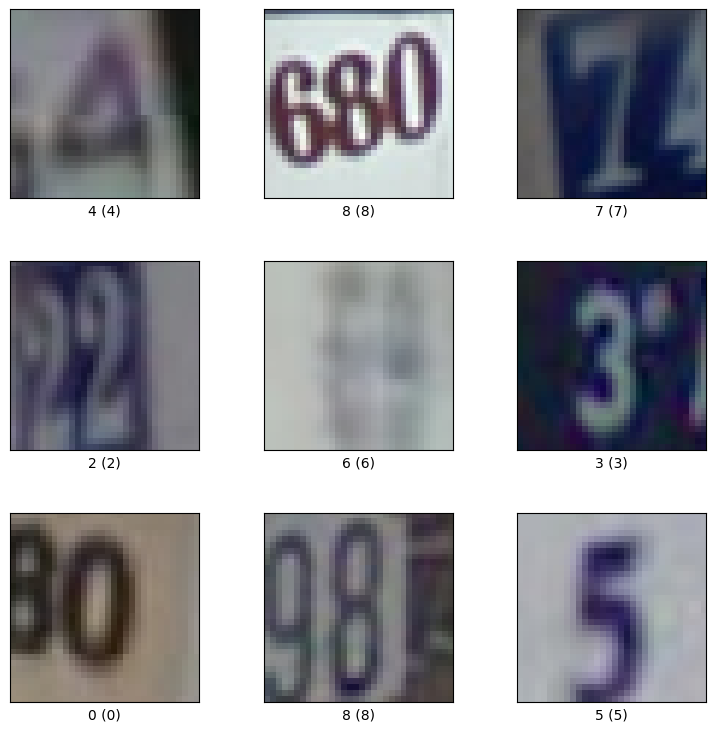

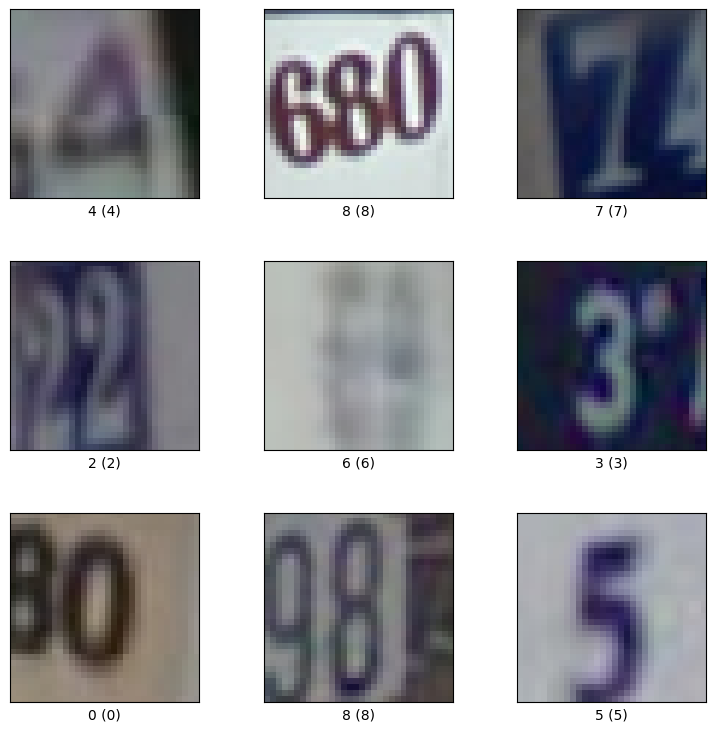

In [ ]:
# Convertimos los primeros 5 ejemplos del conjunto de entrenamiento a un DataFrame de Pandas para visualizar la información
df_train = tfds.as_dataframe(datos['train'].take(5), metadatos)
# Alternativamente, se puede usar tfds.show_examples para visualizar ejemplos directamente
tfds.show_examples(datos['train'], metadatos)

Una vez visualizados algunos datos, ajustamos su escala y modificamos a un tono de blanco y negro para una mejor visualizacion.

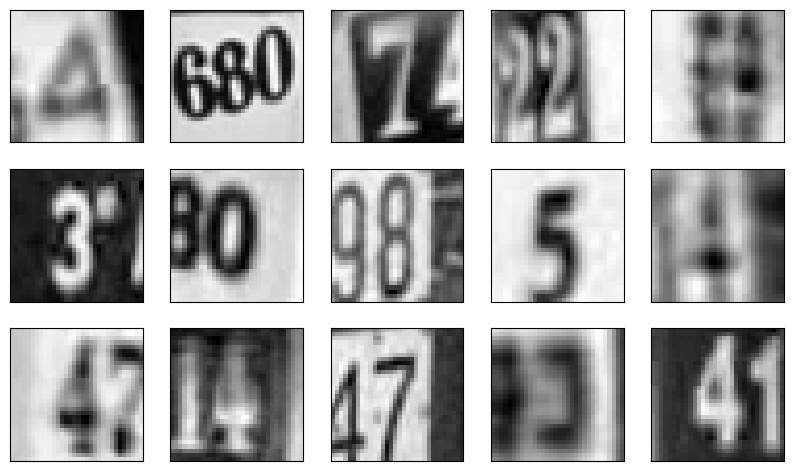

In [ ]:
#Configuracion de la base de datos
# Configuramos el tamaño de la figura
plt.figure(figsize=(10, 10))

# Definimos el tamaño deseado para las imágenes
TAMANO_IMG = 32

# Iteramos sobre los primeros 15 ejemplos del conjunto de entrenamiento
for i, (imagen, etiqueta) in enumerate(datos['train'].take(15)):
    # Redimensionamos la imagen al tamaño especificado
    imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
    # Convertimos la imagen a escala de grises
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)

    # Configuramos la ubicación en la cuadrícula de subgráficos
    plt.subplot(5, 5, i+1)

    # Eliminamos los ejes x e y
    plt.xticks([])
    plt.yticks([])

    # Mostramos la imagen en escala de grises
    plt.imshow(imagen, cmap='gray')

# Mostramos la figura con las imágenes modificadas
plt.show()

##Modificaciones de las imagenes

Entrenamiento y validacion.

In [ ]:
## Entrenamiento

datos_entrenamiento = []  # Lista para el entrenamiento

# Iteramos sobre todos los datos del conjunto de entrenamiento
for i, (imagen, etiqueta) in enumerate(datos['train']):
    # Redimensionamos la imagen a un arreglo de NumPy con el tamaño especificado
    imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG))
    # Convertimos la imagen a escala de grises
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    # Añadimos la imagen y su etiqueta a la lista de datos de entrenamiento
    datos_entrenamiento.append([imagen, etiqueta])


In [ ]:
# Verificar la cantidad de datos en la variable datos_entrenamiento
cantidad_datos_entrenamiento = len(datos_entrenamiento)
print("Cantidad de datos en la variable datos_entrenamiento:", cantidad_datos_entrenamiento)

Cantidad de datos en la variable datos_entrenamiento: 73257


In [ ]:
datos_entrenamiento[0] #La imagen es un arreglo que va de 0-255

[array([[136, 137, 138, ...,  19,  20,  20],
        [137, 137, 138, ...,  20,  20,  20],
        [138, 137, 137, ...,  20,  21,  20],
        ...,
        [ 91,  78,  71, ...,  94,  68,  44],
        [ 81,  71,  68, ...,  98,  73,  47],
        [ 73,  67,  68, ..., 104,  78,  51]], dtype=uint8),
 <tf.Tensor: shape=(), dtype=int64, numpy=4>]

In [ ]:
#Preparar mis variables X (entradas) y y (etiquetas) separadas

X = [] #imagenes de entrada (pixeles)
y = [] #etiquetas (números de 0-9)

for imagen, etiqueta in datos_entrenamiento:
  X.append(imagen)
  y.append(etiqueta)

In [ ]:
#Normalizar
X = np.array(X).astype(float) / 255
#Tamaño de la variable X
X.shape

(73257, 32, 32)

In [ ]:
#Convertir etiquetas en arreglo simple
y = np.array(y)

In [ ]:
##  Validacion

datos_validacion = [] #Lista para entrenar
for i, (imagen, etiqueta) in enumerate(datos['test']): #Todos los datos
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG)) #Cambio a un arreglo de numpy
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY) #Cambio a blanco y negro
  datos_validacion.append([imagen, etiqueta])

In [ ]:
# Verificar la cantidad de datos en la variable datos_validacion
len(datos_validacion)

26032

In [ ]:
#Preparar mis variables X (entradas) y y (etiquetas) separadas

X_val = [] #imagenes de entrada (pixeles)
y_val = [] #etiquetas (números de 0-9)

for imagen, etiqueta in datos_validacion:
  X_val.append(imagen)
  y_val.append(etiqueta)

#Normalizar
X_val = np.array(X_val).astype(float) / 255
y_val = np.array(y_val)

## Imagenes de prueba:


In [ ]:
muestra = datos['extra'].take(10000) # se toman 10,000 imagenes del conjunto extra como muestra para las pruebas

In [ ]:
#imagenes pruebas
#Separamos lo datos
datos_pruebas = [] #Lista para entrenar
for i, (imagen, etiqueta) in enumerate(muestra): #Todos los datos
  imagen = cv2.resize(imagen.numpy(), (TAMANO_IMG, TAMANO_IMG)) #Cambio a un arreglo de numpy
  imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY) #Cambio a blanco y negro
  datos_pruebas.append([imagen, etiqueta])

In [ ]:
#Separar las imagenes y las etiquetas
#Preparar mis variables X (entradas) y y (etiquetas) separadas

imagenes_prueba = [] #imagenes de entrada (pixeles)
etiquetas_prueba = [] #etiquetas (números de 0-9)

for imagen, etiqueta in datos_pruebas:
  imagenes_prueba.append(imagen)
  etiquetas_prueba.append(etiqueta)

#Normalizar
imagenes_prueba = np.array(imagenes_prueba).astype(float) / 255
etiquetas_prueba = np.array(etiquetas_prueba)

___________________________

##Modelo denso:

In [ ]:
# Definir un modelo denso
modeloDenso = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 1)),  # Capa de aplanado
    tf.keras.layers.Dense(64, activation='relu'),  # Capa densa con activación ReLU
    tf.keras.layers.Dense(64, activation='relu'),  # Capa densa con activación ReLU
    tf.keras.layers.Dense(10, activation='softmax')  # Capa de salida con activación Softmax
])


In [ ]:
modeloDenso.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
#La variable de tensorboard se envia en el arreglo de "callbacks" (hay otros tipos de callbacks soportados)
#En este caso guarda datos en la carpeta indicada en cada epoca, de manera que despues
#Tensorboard los lee para hacer graficas

"""Mediante la libreria time se mide el tiempo de ejecucion que tardo el sistema en
entrenar el modelo para el numero de epocas dado por medio de las variables tf y ti, se
realiza al final un calculo aritmetico para imprimir el tiempo en minutos y segundos"""
import time

ti = time.time()

tensorboardDenso = TensorBoard(log_dir='logs/denso')
histDenso = modeloDenso.fit(X, y,
                epochs=10,
                validation_data=(X_val, y_val),
                callbacks=[tensorboardDenso])

tf = time.time()
duracion = int(tf - ti)
min_t_total = int(duracion / 60)
if duracion % 60 == 0:
    duracion = 0
else:
    duracion = duracion - (min_t_total * 60)
print("Tiempo de compilacion y ejecucion: {} minutos y {} segundos".format(min_t_total, duracion))

Epoch 1/10
2290/2290 [==============================] - 12s 5ms/step - loss: 2.0208 - accuracy: 0.2843 - val_loss: 1.7942 - val_accuracy: 0.3822
Epoch 2/10
2290/2290 [==============================] - 10s 4ms/step - loss: 1.7470 - accuracy: 0.3910 - val_loss: 1.7808 - val_accuracy: 0.3826
Epoch 3/10
2290/2290 [==============================] - 9s 4ms/step - loss: 1.7180 - accuracy: 0.4031 - val_loss: 1.7772 - val_accuracy: 0.3825
Epoch 4/10
2290/2290 [==============================] - 10s 4ms/step - loss: 1.6677 - accuracy: 0.4247 - val_loss: 1.6804 - val_accuracy: 0.4329
Epoch 5/10
2290/2290 [==============================] - 10s 4ms/step - loss: 1.5929 - accuracy: 0.4516 - val_loss: 1.6391 - val_accuracy: 0.4385
Epoch 6/10
2290/2290 [==============================] - 10s 4ms/step - loss: 1.5437 - accuracy: 0.4704 - val_loss: 1.5904 - val_accuracy: 0.4675
Epoch 7/10
2290/2290 [==============================] - 10s 4ms/step - loss: 1.5068 - accuracy: 0.4880 - val_loss: 1.5694 - val_acc

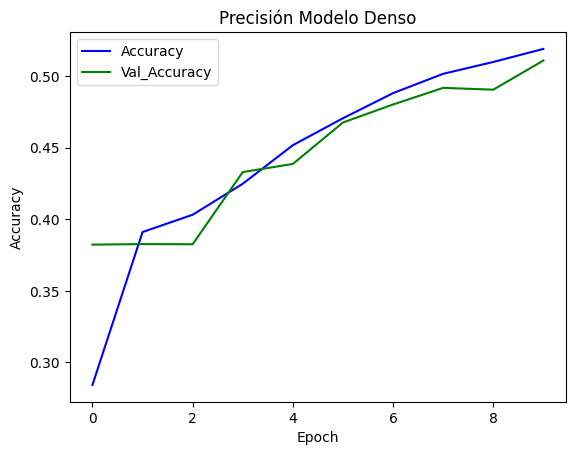

In [ ]:
# Graficar la precisión
plt.plot(histDenso.history['accuracy'], label='Accuracy', c='blue')
plt.plot(histDenso.history['val_accuracy'], label='Val_Accuracy', c='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Precisión Modelo Denso')
plt.legend()
plt.show()


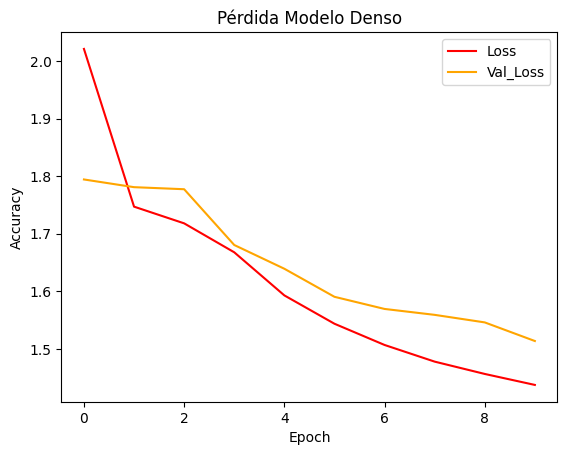

In [ ]:
# Graficar la pérdida
plt.plot(histDenso.history['loss'], label='Loss', c='red')
plt.plot(histDenso.history['val_loss'], label='Val_Loss', c='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Pérdida Modelo Denso')
plt.legend()
plt.show()

### Pruebas y predicciones:

In [ ]:
"""Por medio de .evaluate se usa como muestra una imagen aleatoria junto con su etiqueta del subconjunto
de extras para comprobar la eficiencia de cada modelo"""
test_loss, test_accuracy = modeloDenso.evaluate(imagenes_prueba, etiquetas_prueba, verbose = 0)

print("La perdida es:", test_loss)
print("El accuracy es:", test_accuracy)

La perdida es: 1.2991520166397095
El accuracy es: 0.5569000244140625


1/1 [==============================] - 0s 76ms/step


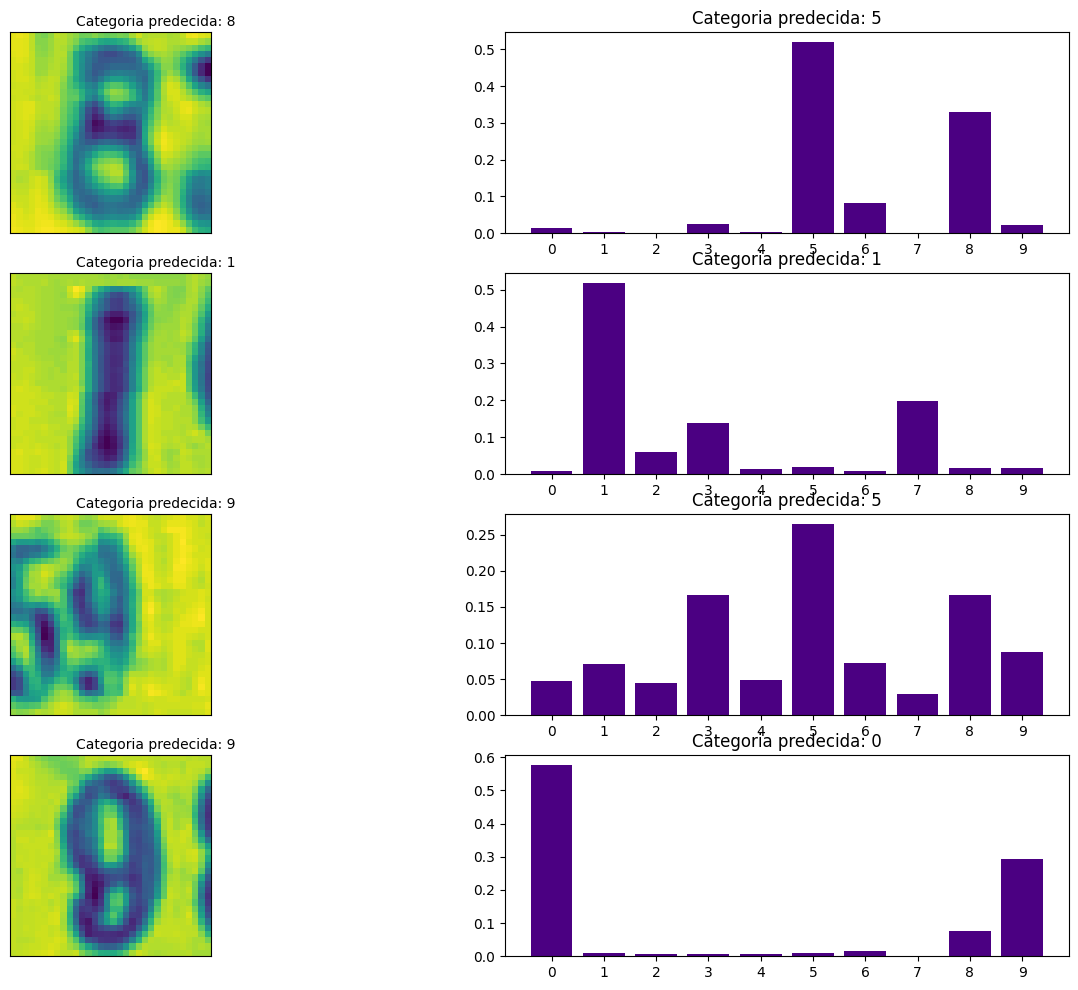

In [ ]:
"""En los siguientes bloques de codigo se realiza una comparacion grafica entre las categorias
que se muestran en las imagenes y las categorias que los modelos predicen con funcion en aquel
de mayor probabilidad de a cuerdo con su numero coincidencias en pixeles"""
num_test_images = imagenes_prueba.shape[0]

random_inx = np.random.choice(num_test_images, 4, replace = True)
random_test_images = imagenes_prueba[random_inx]
random_test_labels = etiquetas_prueba[random_inx]

predicciones = modeloDenso.predict(random_test_images) # con .predict se inicializa el modelo para realizar predicciones

fig, axes = plt.subplots(4, 2, figsize = (16, 12))

for i, (prediccion, image, label) in enumerate(zip(predicciones, random_test_images, random_test_labels)):
  axes[i, 0].imshow(np.squeeze(image))
  axes[i, 0].get_xaxis().set_visible(False)
  axes[i, 0].get_yaxis().set_visible(False)
  axes[i, 0].text(10., -1.5, f'Categoria predecida: {label}')
  axes[i, 1].bar(np.arange(len(prediccion)), prediccion, color = 'indigo')
  axes[i, 1].set_xticks(np.arange(len(prediccion)))
  axes[i, 1].set_title(f'Categoria predecida: {np.argmax(prediccion)}')

__________________

##Modelo convolucional 1:



In [ ]:
# Definir un modelo de red neuronal convolucional (CNN)
modeloCNN = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),  # Capa convolucional
    tf.keras.layers.MaxPooling2D(2, 2),  # Capa de max pooling
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),  # Capa convolucional
    tf.keras.layers.MaxPooling2D(2, 2),  # Capa de max pooling
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),  # Capa convolucional
    tf.keras.layers.MaxPooling2D(2, 2),  # Capa de max pooling

    tf.keras.layers.Flatten(),  # Capa de aplanado
    tf.keras.layers.Dense(100, activation='relu'),  # Capa densa con activación ReLU
    tf.keras.layers.Dense(10, activation='softmax')  # Capa de salida con activación Softmax
])


In [ ]:
modeloCNN.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
ti = time.time()

tensorboardCNN = TensorBoard(log_dir='logs/cnn')
histCNN = modeloCNN.fit(X, y,
                epochs=10,
                validation_data=(X_val, y_val),
                callbacks=[tensorboardCNN])

tf = time.time()
duracion = int(tf - ti)
min_t_total = int(duracion / 60)
if duracion % 60 == 0:
    duracion = 0
else:
    duracion = duracion - (min_t_total * 60)
print("Tiempo de compilacion y ejecucion: {} minutos y {} segundos".format(min_t_total, duracion))

Epoch 1/10
2290/2290 [==============================] - 20s 6ms/step - loss: 0.9016 - accuracy: 0.7167 - val_loss: 0.6048 - val_accuracy: 0.8287
Epoch 2/10
2290/2290 [==============================] - 16s 7ms/step - loss: 0.4674 - accuracy: 0.8649 - val_loss: 0.4625 - val_accuracy: 0.8724
Epoch 3/10
2290/2290 [==============================] - 13s 6ms/step - loss: 0.3855 - accuracy: 0.8863 - val_loss: 0.4012 - val_accuracy: 0.8868
Epoch 4/10
2290/2290 [==============================] - 14s 6ms/step - loss: 0.3378 - accuracy: 0.8990 - val_loss: 0.3735 - val_accuracy: 0.8938
Epoch 5/10
2290/2290 [==============================] - 13s 6ms/step - loss: 0.3040 - accuracy: 0.9099 - val_loss: 0.3649 - val_accuracy: 0.8972
Epoch 6/10
2290/2290 [==============================] - 12s 5ms/step - loss: 0.2799 - accuracy: 0.9166 - val_loss: 0.3512 - val_accuracy: 0.9007
Epoch 7/10
2290/2290 [==============================] - 13s 5ms/step - loss: 0.2589 - accuracy: 0.9231 - val_loss: 0.3563 - val_ac

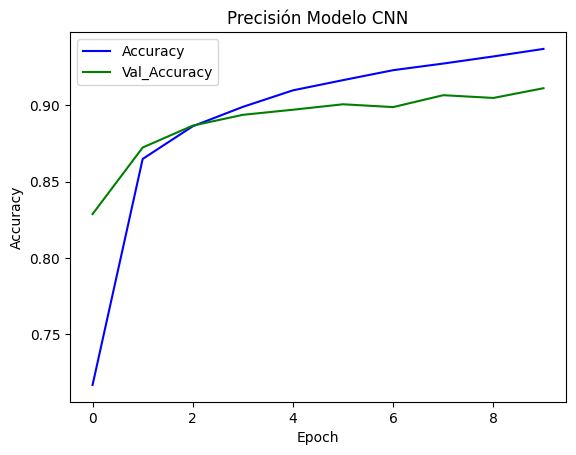

In [ ]:
# Graficar la precisión
plt.plot(histCNN.history['accuracy'], label='Accuracy', c='blue')
plt.plot(histCNN.history['val_accuracy'], label='Val_Accuracy', c='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Precisión Modelo CNN')
plt.legend()
plt.show()

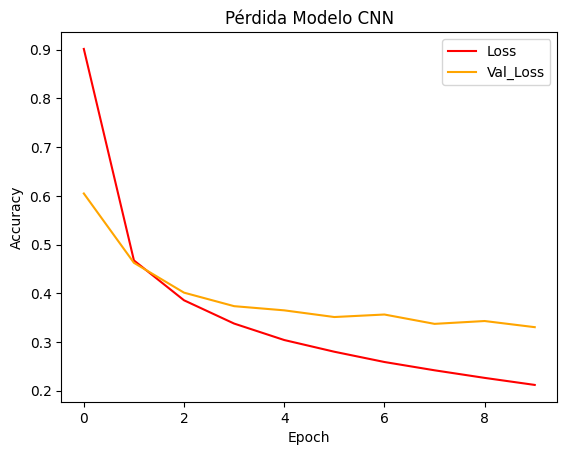

In [ ]:
# Graficar la pérdida
plt.plot(histCNN.history['loss'], label='Loss', c='red')
plt.plot(histCNN.history['val_loss'], label='Val_Loss', c='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Pérdida Modelo CNN')
plt.legend()
plt.show()

### Pruebas y predicciones:

In [ ]:
"""Analogo al modelo anterior"""
test_loss, test_accuracy = modeloCNN.evaluate(imagenes_prueba, etiquetas_prueba, verbose = 0)

print("La perdida es:", test_loss)
print("El accuracy es:", test_accuracy)

La perdida es: 0.17493025958538055
El accuracy es: 0.9516000151634216


1/1 [==============================] - 0s 28ms/step


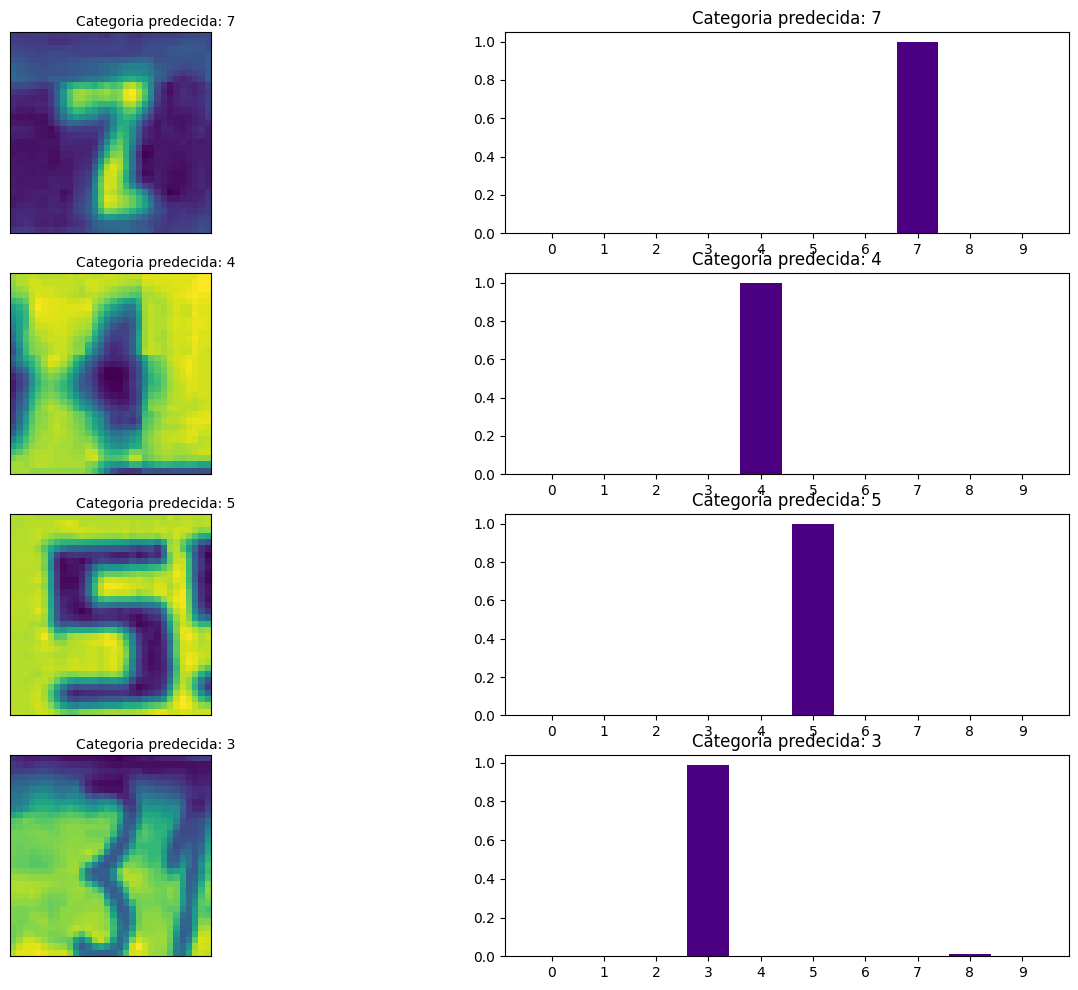

In [ ]:
"""Analogo al modelo anterior"""
num_test_images = imagenes_prueba.shape[0]

random_inx = np.random.choice(num_test_images, 4, replace = True)
random_test_images = imagenes_prueba[random_inx]
random_test_labels = etiquetas_prueba[random_inx]

predicciones = modeloCNN.predict(random_test_images) # con .predict se inicializa el modelo para realizar predicciones

fig, axes = plt.subplots(4, 2, figsize = (16, 12))

for i, (prediccion, image, label) in enumerate(zip(predicciones, random_test_images, random_test_labels)):
  axes[i, 0].imshow(np.squeeze(image))
  axes[i, 0].get_xaxis().set_visible(False)
  axes[i, 0].get_yaxis().set_visible(False)
  axes[i, 0].text(10., -1.5, f'Categoria predecida: {label}')
  axes[i, 1].bar(np.arange(len(prediccion)), prediccion, color = 'indigo')
  axes[i, 1].set_xticks(np.arange(len(prediccion)))
  axes[i, 1].set_title(f'Categoria predecida: {np.argmax(prediccion)}')

______________________

##Modelo convusional 2:

In [ ]:
"""Análogo al primer modelo convolucional, se genera una secuencia de capas con tensores como entradas,
en este caso se usan tangentes hiperbolicas (250) y una sigmoidal (10) como funciones de activacion y
haciendo uso de un dropout de 0.5"""
modeloCNN2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='tanh', input_shape=(32, 32, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='tanh'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(128, (3,3), activation='tanh'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(250, activation='tanh'),
  tf.keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
modeloCNN2.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [ ]:
"""Analogamente se entrena el modelo con 10 epocas y se mide el tiempo de ejecucion y compilacion"""
ti = time.time()

tensorboardCNN2 = TensorBoard(log_dir='logs/cnn2')
histCNN2 = modeloCNN2.fit(X, y,
                epochs=10,
                validation_data=(X_val, y_val),
                callbacks=[tensorboardCNN2])

tf = time.time()
duracion = int(tf - ti)
min_t_total = int(duracion / 60)
if duracion % 60 == 0:
    duracion = 0
else:
    duracion = duracion - (min_t_total * 60)
print("Tiempo de compilacion y ejecucion: {} minutos y {} segundos".format(min_t_total, duracion))

Epoch 1/10
2290/2290 [==============================] - 17s 6ms/step - loss: 0.8125 - accuracy: 0.7484 - val_loss: 0.5481 - val_accuracy: 0.8445
Epoch 2/10
2290/2290 [==============================] - 14s 6ms/step - loss: 0.5433 - accuracy: 0.8351 - val_loss: 0.5057 - val_accuracy: 0.8509
Epoch 3/10
2290/2290 [==============================] - 14s 6ms/step - loss: 0.4752 - accuracy: 0.8558 - val_loss: 0.4239 - val_accuracy: 0.8762
Epoch 4/10
2290/2290 [==============================] - 13s 6ms/step - loss: 0.4373 - accuracy: 0.8669 - val_loss: 0.4008 - val_accuracy: 0.8833
Epoch 5/10
2290/2290 [==============================] - 13s 6ms/step - loss: 0.4013 - accuracy: 0.8781 - val_loss: 0.3937 - val_accuracy: 0.8845
Epoch 6/10
2290/2290 [==============================] - 13s 6ms/step - loss: 0.3791 - accuracy: 0.8854 - val_loss: 0.3714 - val_accuracy: 0.8903
Epoch 7/10
2290/2290 [==============================] - 13s 6ms/step - loss: 0.3652 - accuracy: 0.8898 - val_loss: 0.3757 - val_ac

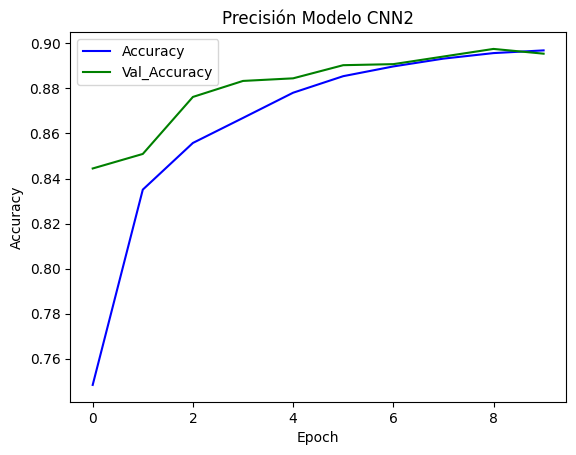

In [ ]:
# Graficar la precisión
plt.plot(histCNN2.history['accuracy'], label='Accuracy', c='blue')
plt.plot(histCNN2.history['val_accuracy'], label='Val_Accuracy', c='green')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Precisión Modelo CNN2')
plt.legend()
plt.show()

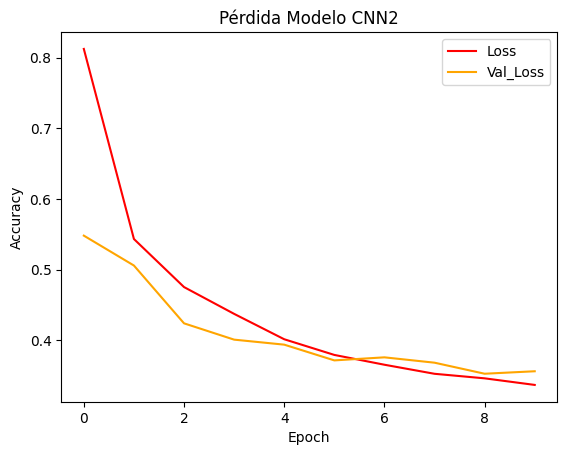

In [ ]:
# Graficar la pérdida
plt.plot(histCNN2.history['loss'], label='Loss', c='red')
plt.plot(histCNN2.history['val_loss'], label='Val_Loss', c='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Pérdida Modelo CNN2')
plt.legend()
plt.show()

### Pruebas y predicciones:

In [ ]:
"""Analogo al modelo anterior"""
test_loss, test_accuracy = modeloCNN2.evaluate(imagenes_prueba, etiquetas_prueba, verbose = 0)

print("La perdida es:", test_loss)
print("El accuracy es:", test_accuracy)

La perdida es: 0.18064869940280914
El accuracy es: 0.9476000070571899


1/1 [==============================] - 0s 17ms/step


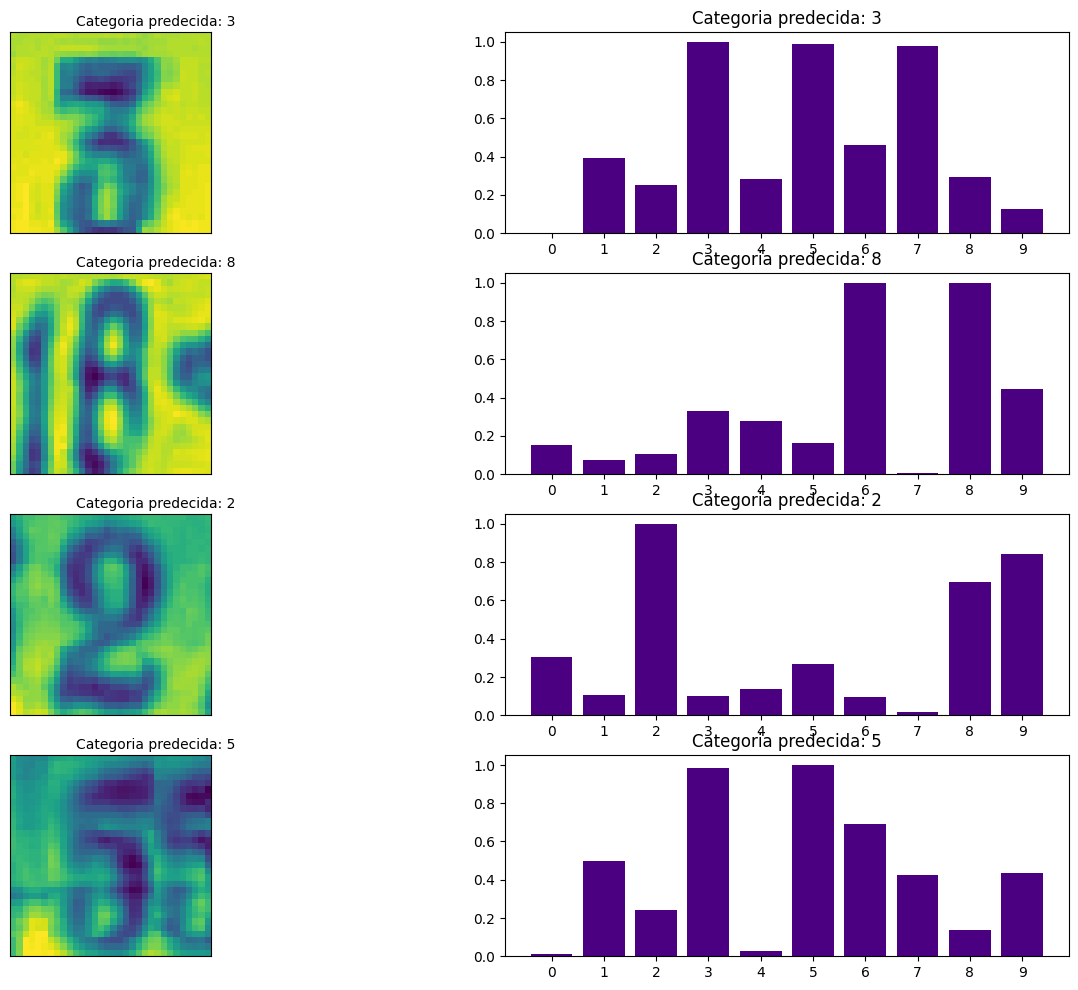

In [ ]:
"""Analogo al modelo anterior"""
num_test_images = imagenes_prueba.shape[0]

random_inx = np.random.choice(num_test_images, 4, replace = True)
random_test_images = imagenes_prueba[random_inx]
random_test_labels = etiquetas_prueba[random_inx]

predicciones = modeloCNN2.predict(random_test_images) # con .predict se inicializa el modelo para realizar predicciones

fig, axes = plt.subplots(4, 2, figsize = (16, 12))

for i, (prediccion, image, label) in enumerate(zip(predicciones, random_test_images, random_test_labels)):
  axes[i, 0].imshow(np.squeeze(image))
  axes[i, 0].get_xaxis().set_visible(False)
  axes[i, 0].get_yaxis().set_visible(False)
  axes[i, 0].text(10., -1.5, f'Categoria predecida: {label}')
  axes[i, 1].bar(np.arange(len(prediccion)), prediccion, color = 'indigo')
  axes[i, 1].set_xticks(np.arange(len(prediccion)))
  axes[i, 1].set_title(f'Categoria predecida: {np.argmax(prediccion)}')

____________________________

## Conclusión:

### El modelo más adecuado para este problema resultó ser la primer red convolucional definida. Esto debido a que es el cual mejor evoluciona con funcion en las épocas vs costos y realiza las mejores predicciones.

_________________________

___________________